To find the equations of motion for a triple pendulum we begin with the explicit statement of the lagrangian.  The position of the nth pendulum may be expressed in terms of the angles $\theta_1$, $\theta_2$, and $\theta_3$ as 
\begin{equation*}
    x_n = \sum_{k=1}^{k=n}l_ksin(\theta_k) ~~~~~~~~~~ y_n = -\sum_{k = 1}^{k = n}l_kcos(\theta_k)
\end{equation*}
For the Lagrangian we may express the total potential energy as 
\begin{equation*}
\begin{split}
    U =& \sum_{j=1}^{j=3}m_jgy_j \\ 
    =& -g\sum_{j=1}^{j=3}m_j\sum_{k=1}^{k=j}l_kcos(\theta_k)
\end{split}
\end{equation*}
Similarly we may express the total kinetic energy as 
\begin{equation*}
\begin{split}
    T =& \frac{1}{2}\sum_{j =1}^{j=3}m_jv_j^2 \\ 
    =& \frac{1}{2}\sum_{j=1}^{j=3}m_j\left(\left(\sum_{k=1}^{k=j}l_kcos(\theta_k)\dot{\theta_k}\right)^2 + \left(\sum_{k=1}^{k=j}l_ksin(\theta_k)\dot{\theta_k}\right)^2\right)
\end{split}
\end{equation*}
So that the total Lagrangian of the system is 
\begin{equation*}
    \mathcal{L} = \frac{1}{2}\sum_{j=1}^{j=3}m_j\left(\left(\sum_{k=1}^{k=j}l_kcos(\theta_k)\dot{\theta_k}\right)^2 + \left(\sum_{k=1}^{k=j}l_ksin(\theta_k)\dot{\theta_k}\right)^2\right)+g\sum_{j=1}^{j=3}m_j\sum_{k=1}^{k=j}l_kcos(\theta_k)
\end{equation*}
    Taking the partial derivatives of this equation gives us, after some moderate simplification, 
    \begin{equation*}
    \begin{split}
        \frac{\partial \mathcal{L}}{\partial \dot{\theta_i}} =& l_i\sum_{j=i}^{j=3}m_j\sum_{k=1}^{k=j}l_kcos(\theta_i-\theta_k)\dot{\theta_k} \\ 
        \frac{\partial \mathcal{L}}{\partial \theta_i} =& -l_i\sum_{j=i}^{j=3}m_j\sum_{k=1}^{k=j}l_ksin(\theta_i - \theta_k)\dot{\theta_i}\dot{\theta_k} - gl_isin(\theta_i) \sum_{j=i}^{j=3}m_j
    \end{split}
    \end{equation*}
    Differentiating the first term and setting the two equal to get the total EL equations for this system gives us 
    \begin{equation*}
      -l_i\sum_{j=i}^{j=3}m_j\sum_{k=1}^{k=j}l_ksin(\theta_i-\theta_k)(\dot{\theta_k}\dot{\theta_i}-\dot{\theta_k}^2) + l_i\sum_{j=i}^{j=3}m_j\sum_{k=1}^{k=j}l_kcos(\theta_i-\theta_k)\ddot{\theta_k}  = -l_i\sum_{j=i}^{j=3}m_j\sum_{k=1}^{k=j}l_ksin(\theta_i - \theta_k)\dot{\theta_i}\dot{\theta_k} - gl_isin(\theta_i) \sum_{j=i}^{j=3}m_j
      \end{equation*}
      Which we can simplify drastically by eliminating like terms as 
      \begin{equation*}
      \sum_{j=i}^{j=3}m_j\sum_{k=1}^{k=j}l_kcos(\theta_i-\theta_k)\ddot{\theta_k} =  - gl_isin(\theta_i) \sum_{j=i}^{j=3}m_j- \sum_{j=i}^{j=3}m_j\sum_{k=1}^{k=j}l_ksin(\theta_i-\theta_k)\dot{\theta_k}^2
      \end{equation*} 
      
This can be written slightly more elegantly in matrix form (a misuse as the functions are not linear), which gives 
$\begin{align}
{A}\ddot{\phi} = {B}\begin{bmatrix} 
-1 & -1 \end{bmatrix}^T
\end{align}$

Where, specifically for the 3x3 case the above matricies {A} and {B} can be written as

$\begin{align}
{A} = \begin{bmatrix}
(m_1 + m_2 + m_3)l_1 & (m_2 + m_3)l_2cos(\theta_1 - \theta_2) & m_3l_3cos(\theta_1 - \theta_3) \\ 
(m_2 + m_3)l_1cos(\theta_2 - \theta_1) & (m_2 + m_3)l_2 & m_3l_3cos(\theta_2 - \theta_3) \\ 
m_3l_3cos(\theta_3 - \theta_1) & m_3l_2cos(\theta_2 - \theta_3) & m_3l_3
\end{bmatrix}
\end{align}$

and the second matrix can be written as
$\begin{align}
{B} = \begin{bmatrix}
(m_1 + m_2 + m_3)gsin(\theta_1) & (m_2 + m_3)l_2\dot{\theta_2}^2sin(\theta_1 - \theta_2) & m_3l_3\dot{\theta_3}^2sin(\theta_1 - \theta_3) \\ 
(m_2 + m_3)l_1\dot{\theta_1}^2sin(\theta_2 - \theta_1) & (m_2 + m_3)gsin(\theta_2) & m_3l_3\dot{\theta_3}sin(\theta_2 - \theta_3) \\ 
m_3l_3\dot{\theta_1}^2sin(\theta_3 - \theta_1) & m_3l_2\dot{\theta_2}^2sin(\theta_2 - \theta_3) & m_3gsin(\theta_3)
\end{bmatrix}
\end{align}$

Getting a closed form for each of the angles is possible, but each one is 4-5 lines of text long, and so for the preservation of readability, the A matrix will be inverted in each step

In [1]:
import numpy as np 
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
import math

In [95]:
class Pendulum:
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a double pendulum (no driving or damping).
     
    Parameters
    ----------
    l1, l2, l3 : float
        length of the pendulum bars
    g : float
        gravitational acceleration at the earth's surface
    m1, m2, m3 : float
        mass of pendulum bobs

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
        
    solve_ode(self, 
              t_pts,
              phi_01, phi_02, phi_03, 
              phi_dot_01, phi_dot_02, phi_dot_03,
              abserr=1.0e-14, relerr=1.0e-12)
        Solves the ODE system and returns the angles as a function of time
    """
    def __init__(self, m1, m2, m3, l1, l2, l3):
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.l1 = l1
        self.l2 = l2
        self.l3 = l3
        
    def dy_dt(self, t, y):
        #test comment        
        g = 9.81
        
        A = np.zeros((3, 3))
        B = np.zeros((3, 3))
        
        #Sets the elements of the A matrix as detailed above
        A = [
            [(self.m1 + self.m2 + self.m3)*self.l1, 
              (self.m2 + self.m3)*self.l2*np.cos(y[0]-y[1]), 
              self.m3*self.l3*np.cos(y[0]-y[2])], 
             
             [(self.m2 + self.m3)*self.l1*np.cos(y[1]-y[0]), 
              (self.m2 + self.m3)*self.l2, 
              self.m3*self.l3*np.cos(y[1]-y[2])], 
             
             [self.m3*self.l1*np.cos(y[2]-y[0]), 
              self.m3*self.l2*np.cos(y[1]-y[0]), 
              self.m3*self.l3]
            ]
                
        #Sets the elements of the B matrix as detailed above
        B = [
            [(self.m1 + self.m2 + self.m3)*g*np.sin(y[0]), 
              (self.m2 + self.m3)*self.l2*(y[4] ** 2)*np.sin(y[0]-y[1]), 
              self.m3*self.l3*(y[5] ** 2)*np.sin(y[0]-y[2])], 
             
             [(self.m2 + self.m3)*self.l1 * (y[3] ** 2)*np.sin(y[1]-y[0]), 
              (self.m2 + self.m3)*g*np.sin(y[1]), 
              self.m3*self.l3*(y[5]**2)*np.sin(y[1]-y[2])], 
             
             [self.m3*self.l1*(y[3]**2)*np.sin(y[2]-y[0]), 
              self.m3*self.l2*(y[4]**2)*np.sin(y[1]-y[0]), 
              self.m3*g*np.sin(y[2])]
            ]
    
        #convert to matrix for linear algebra
        A = np.matrix(A)
        B = np.matrix(B)
        
        temp = np.dot(B, [[-1], [-1], [-1]])
        Ainv = inv(A)
        #Store the final rhs in answer
        answer = np.dot(Ainv, temp)
            
        return [y[3], y[4], y[5], answer[0], answer[1], answer[2]]
    
    
    
    
    def solve_ode(self, 
                  t_pts,
                  phi_01, phi_02, phi_03, 
                  phi_dot_01, phi_dot_02, phi_dot_03,
                  abserr=1.0e-14, relerr=1.0e-12):
      #set initial conditions
        y = [phi_01, phi_02, phi_03, phi_dot_01, phi_dot_02, phi_dot_03] 

        solution = solve_ivp(self.dy_dt, 
                             (t_pts[0], t_pts[-1]), 
                             y, 
                             t_eval=t_pts, 
                             dense_output = True,
                             atol=abserr,
                             rtol=relerr, 
                             method = 'BDF')
        
        return solution
    
    

## Angle Output

In [63]:
#set up the pendulum
p1 = Pendulum(1, .5, .25, 1, 2./3., 1./3.)

#initial parameters
phi0 = np.pi/6
phi1 = np.pi/2
phi2 = 5*np.pi/6

dphi0 = 0
dphi1 = 0
dphi2 = -.5

t_pts = np.arange(0., 20., 0.0001)
#solve
sol = p1.solve_ode(t_pts, 
                     phi0, phi1, phi2, 
                     dphi0, dphi1, dphi2)

Text(0.5, 0, 'time (t)')

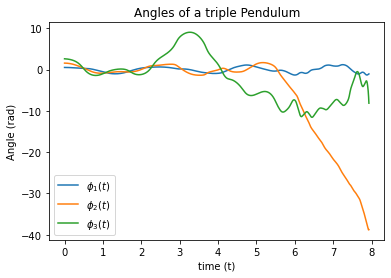

In [65]:
fig, ax = plt.subplots()
#set up the plot
ax.plot(sol.t, sol.y[0], label = r'$\phi_1(t)$')
ax.plot(sol.t, sol.y[1], label = r'$\phi_2(t)$')
ax.plot(sol.t, sol.y[2], label = r'$\phi_3(t)$')
#legend positioning and labels
ax.legend(loc = 'lower left')
ax.set_title('Angles of a triple Pendulum')
ax.set_ylabel('Angle (rad)')
ax.set_xlabel('time (t)')

## Demonstration of Chaos

In [83]:
#initialize a basic pendulum
p1 = Pendulum(1, 1, 1, 1, 1, 1)

#degree of variation between the starting conditions
var = .01

#small initial parameters
phi0 = np.pi/6
phi1 = np.pi/6
phi2 = np.pi/6

dphi0 = 0
dphi1 = 0
dphi2 = 0

t_pts = np.arange(0., 20., 0.0001)
#solve the two problems with and without variation
sol1 = p1.solve_ode(t_pts, 
                     phi0, phi0, phi0, 
                     dphi0, dphi1, dphi2)

sol2 = p2.solve_ode(t_pts, 
                   phi0 + var, phi0 + var, phi0 + var, 
                   dphi0, dphi1, dphi2)

#largetial parameters
phi0 = np.pi/2
phi1 = np.pi/2
phi2 = np.pi/2

dphi0 = 0
dphi1 = 0
dphi2 = 0

t_pts = np.arange(0., 20., 0.0001)
#solve the two problems with and without variation
sol3= p1.solve_ode(t_pts, 
                     phi0, phi0, phi0, 
                     dphi0, dphi1, dphi2)

sol4= p2.solve_ode(t_pts, 
                   phi0 + var, phi0 + var, phi0 + var, 
                   dphi0, dphi1, dphi2)

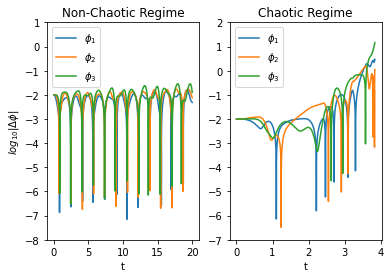

In [94]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)

tmax = min(len(sol1.t), len(sol2.t))
#Plot insensitive regime
ax1.plot(sol1.t[0:tmax], np.log10(abs(sol1.y[0][0:tmax] - sol2.y[0][0:tmax])), 
       label = r'$\phi_1$')
ax1.plot(sol1.t[0:tmax], np.log10(abs(sol1.y[1][0:tmax] - sol2.y[1][0:tmax])), 
       label = r'$\phi_2$')
ax1.plot(sol1.t[0:tmax], np.log10(abs(sol1.y[2][0:tmax] - sol2.y[2][0:tmax])), 
       label = r'$\phi_3$')


tmax = min(len(sol3.t), len(sol4.t))
#Plot chaotic regime
ax2.plot(sol1.t[0:tmax], np.log10(abs(sol3.y[0][0:tmax] - sol4.y[0][0:tmax])), 
       label = r'$\phi_1$')
ax2.plot(sol1.t[0:tmax], np.log10(abs(sol3.y[1][0:tmax] - sol4.y[1][0:tmax])), 
       label = r'$\phi_2$')
ax2.plot(sol1.t[0:tmax], np.log10(abs(sol3.y[2][0:tmax] - sol4.y[2][0:tmax])), 
       label = r'$\phi_3$')

#set plot parameters
ax1.set_title('Non-Chaotic Regime')
ax2.set_title('Chaotic Regime')

ax1.set_ylabel(r'$log_{10}|\Delta \phi|$')
ax1.set_xlabel('t')
ax2.set_xlabel('t')

ax1.set_ylim(-8, 1)
ax2.set_ylim(-7, 2)
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper left')

For the non chaotic conditions we can see that $log_{10}(|\Delta \phi|)$ is non increasing, and so the system is not demonstrating exponential sensitivity to initial conditions.  For the Chaotic system, this is not the case, and there is clearly a positive lyapunov exponent for these initial conditions, demonstrating exponential sensitivity to changes in initial conditions. (The chaotic system progresses only to time 4, before all available ODE solvers for the solve_ivp method failed to progress the integration further due presumably to high relative errors.)